# Objective
Whenever starting a project,first thing that should always be taken care of is to understand the business problem properly. 
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
### In this dataset, we are provided with predictors and we need to built such a model that can help in predicting whether the person will survive or not from test data.

In [1]:
import pandas as pd
import numpy as np

# Importing Training Data

In [2]:
titanic = pd.read_csv('C:/Users/Administrator/Desktop/Python/Kaggle/titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Dropping columns with nominal data

In [4]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

# EDA

## Univariate Analysis

### 1. Gender

   Gender  Survived
0  Female       233
1    Male       109


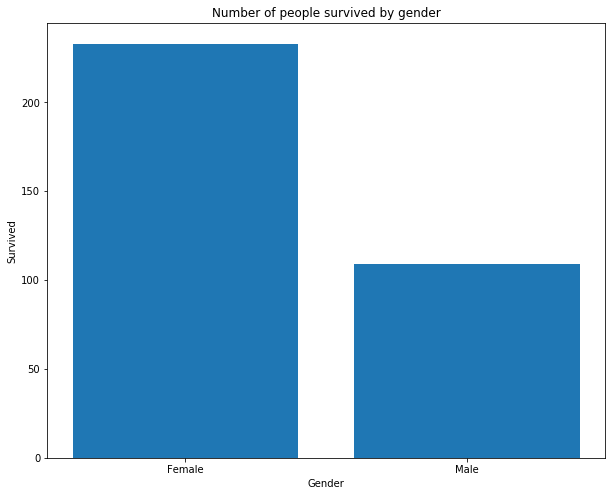

In [6]:
female_survived= titanic[['Sex','Survived']].query('Survived == 1 & Sex == "female"')
male_survived= titanic[['Sex','Survived']].query('Survived == 1 & Sex == "male"')
female_count = female_survived.Sex.count()
male_count = male_survived.Sex.count()
Total_num_survived = pd.DataFrame()
Total_num_survived['Gender'] = ['Female','Male']
Total_num_survived['Survived'] = [female_count,male_count]
print(Total_num_survived)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(Total_num_survived['Gender'],Total_num_survived['Survived'])
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.title('Number of people survived by gender')
plt.show()

- From above we can analyze that proportion of female that survived is quite high as compared to male.

   Gender  Survived
0  Female       233
1    Male       109


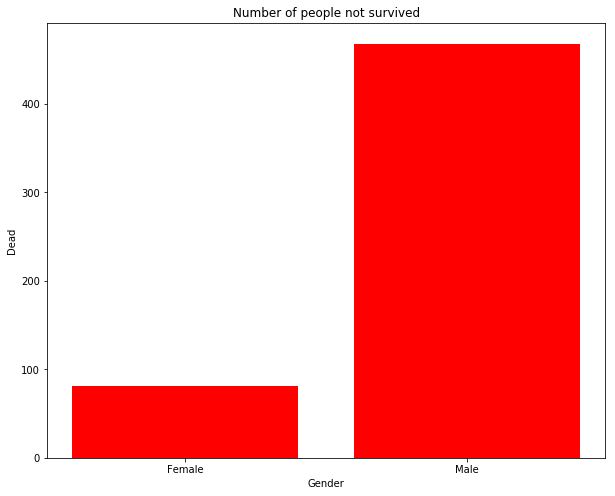

In [7]:
female_dead= titanic[['Sex','Survived']].query('Survived == 0 & Sex == "female"')
male_dead= titanic[['Sex','Survived']].query('Survived == 0 & Sex == "male"')
female_count = female_dead.Sex.count()
male_count = male_dead.Sex.count()
Total_num_dead = pd.DataFrame()
Total_num_dead['Gender'] = ['Female','Male']
Total_num_dead['Dead'] = [female_count,male_count]
print(Total_num_survived)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(Total_num_dead['Gender'],Total_num_dead['Dead'],color='red')
plt.xlabel('Gender')
plt.ylabel('Dead')
plt.title('Number of people not survived')
plt.show()

- From above we can analyze that proportion of male that did not survived is quite high as compared to female.

### 2. Based on Pclass(Passenger-class)

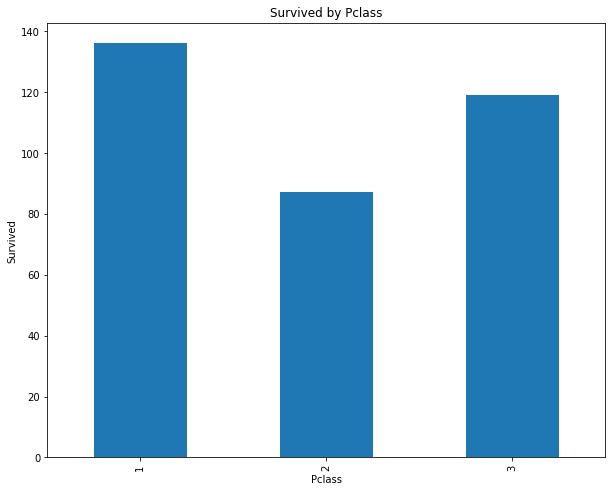

In [9]:
plt.figure(figsize=(10,8))
titanic.query('Survived == 1')[['Pclass','Survived']].groupby('Pclass')['Survived'].count()\
.plot(kind='bar')
plt.ylabel('Survived')
plt.title('Survived by Pclass')
plt.show()

- From above we can analyze that Survival rate for passenger class 1 and 3 is high as compared to class 2.

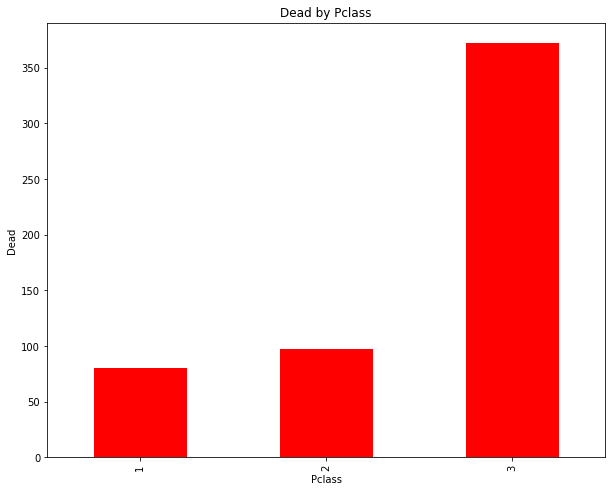

In [10]:
plt.figure(figsize=(10,8))
titanic.query('Survived == 0')[['Pclass','Survived']].groupby('Pclass')['Survived'].count()\
.plot(kind='bar',color='red')
plt.ylabel('Dead')
plt.title('Dead by Pclass')
plt.show()

- From above we can analyze that passenger class 3 has the highest death rate and the generalized reason for that might be majority of the population belongs to class 3.

### 3.Based on SibSp(Sibling-spouse)

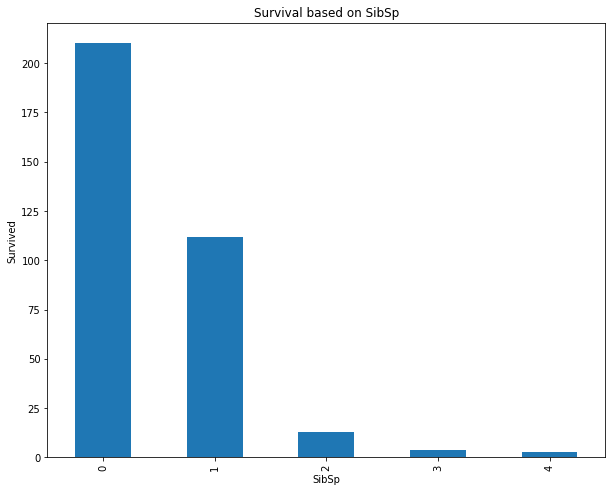

In [11]:
plt.figure(figsize=(10,8))
titanic[['SibSp','Survived']].query('Survived==1')\
.groupby('SibSp')['Survived'].count().plot(kind='bar')
plt.ylabel('Survived')
plt.title('Survival based on SibSp')
plt.show()

- From above we can analyze that people with 0 or 1 Sibling-spouse have the highest survival rate.

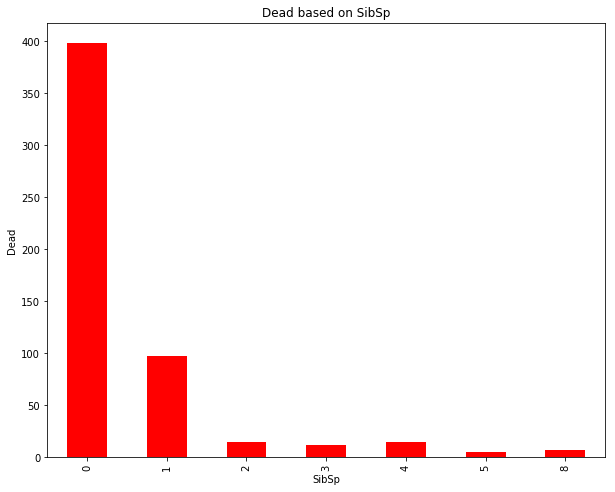

In [12]:
plt.figure(figsize=(10,8))
titanic[['SibSp','Survived']].query('Survived==0')\
.groupby('SibSp')['Survived'].count().plot(kind='bar',color='red')
plt.ylabel('Dead')
plt.title('Dead based on SibSp')
plt.show()

- From above we can analyze that people with 0 or 1 Sibling-spouse have the highest death rate too.
Reason behind that can be majority of the population present had 0 or 1 Sibsp.

### 4.Based on Parch(Parent-children)

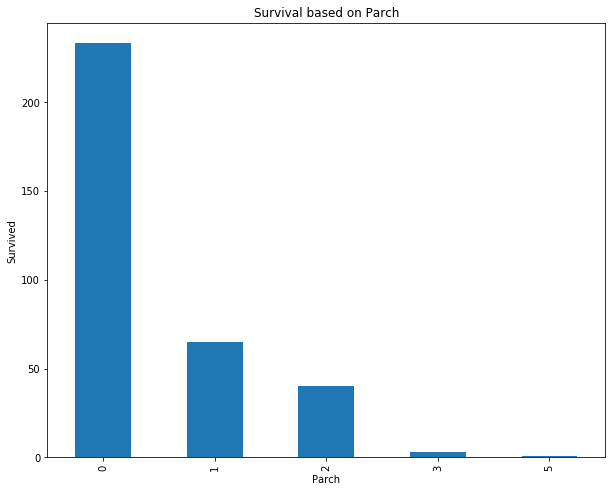

In [13]:
plt.figure(figsize=(10,8))
titanic[['Parch','Survived']].query('Survived==1')\
.groupby('Parch')['Survived'].count().plot(kind='bar')
plt.ylabel('Survived')
plt.title('Survival based on Parch')
plt.show()

- People with np Parent-children had the highest survival rate.

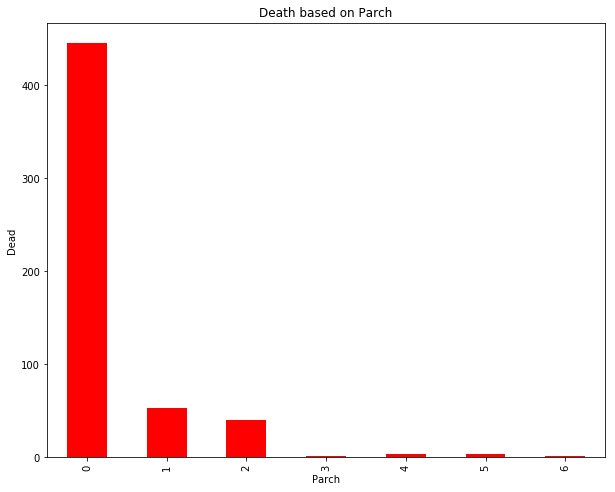

In [14]:
#Dead by Parch
plt.figure(figsize=(10,8))
titanic[['Parch','Survived']].query('Survived==0')\
.groupby('Parch')['Survived'].count().plot(kind='bar',color='red')
plt.ylabel('Dead')
plt.title('Death based on Parch')
plt.show()

- People with np Parent-children had the highest death rate too.

### 5.Based on Embarked

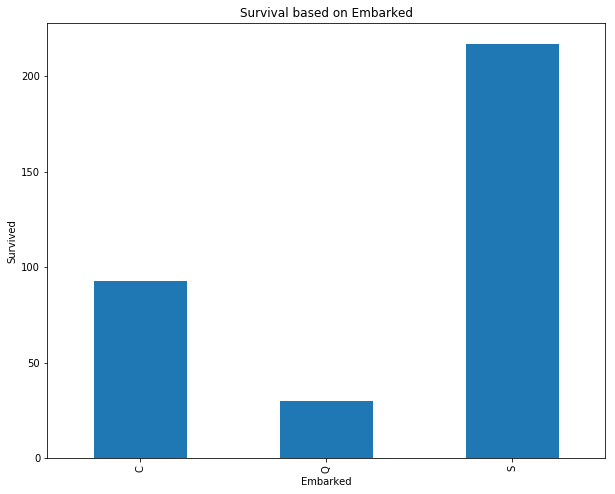

In [15]:
plt.figure(figsize=(10,8))
titanic[['Embarked','Survived']].query('Survived==1').groupby('Embarked')['Survived'].count()\
.plot(kind='bar')
plt.ylabel('Survived')
plt.title('Survival based on Embarked')
plt.show()

- From above we can analyze that majority of the people who embarked from station S have the highest survival rate.

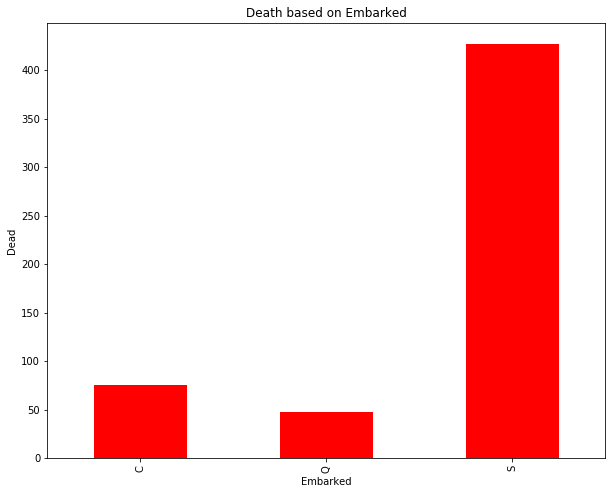

In [16]:
#Dead based on Embarked
plt.figure(figsize=(10,8))
titanic[['Embarked','Survived']].query('Survived == 0').groupby('Embarked')['Survived'].count()\
.plot(kind='bar',color='red')
plt.ylabel('Dead')
plt.title('Death based on Embarked')
plt.show()

- From above we can analyze that majority of the people who embarked from station S have the highest death rate too.

## Missing Value Treatment 

#### Age

In [17]:
#Checking null values
titanic.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

- There are 177 missing values in Age column and 2 in Embarked.

- Treating missing value is one of the most important preprocessing step that needs proper imputation.
- We will follow the below steps for imputation.

In [18]:
'''Fetch mean for every Pclass and Sex'''
a = titanic.groupby(['Pclass','Sex'])['Age'].mean()
a =a.reset_index()
a['Age'] = round(a['Age'])
a

,Pclass,Sex,Age
0,1,female,35.0
1,1,male,41.0
2,2,female,29.0
3,2,male,31.0
4,3,female,22.0
5,3,male,27.0


In [19]:
'''Fetch the missing values in the age column'''
b = titanic[titanic['Age'].isnull()]
b.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [20]:
'''Impute the missing values as per Pclass and Sex that we have fetched above'''
b[(b['Pclass']==1) & (b['Sex']=='female')]=b[(b['Pclass']==1) & (b['Sex']=='female')].fillna(a['Age'][0])
b[(b['Pclass']==1) & (b['Sex']=='male')]=b[(b['Pclass']==1) & (b['Sex']=='male')].fillna(a['Age'][1])
b[(b['Pclass']==2) & (b['Sex']=='female')]=b[(b['Pclass']==2) & (b['Sex']=='female')].fillna(a['Age'][2])
b[(b['Pclass']==2) & (b['Sex']=='male')]=b[(b['Pclass']==2) & (b['Sex']=='male')].fillna(a['Age'][3])
b[(b['Pclass']==3) & (b['Sex']=='female')]=b[(b['Pclass']==3) & (b['Sex']=='female')].fillna(a['Age'][4])
b[(b['Pclass']==3) & (b['Sex']=='male')]=b[(b['Pclass']==3) & (b['Sex']=='male')].fillna(a['Age'][5])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [21]:
'''Making changes to the original dataframe where Age had missing values'''
titanic['Age'] = titanic['Age'].fillna(b['Age'])

#### Embarked

- Dropping 2 rows of missing embarked from our dataframe.

In [22]:
titanic.dropna(axis=0,inplace=True)

In [23]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 6. Histogram Based on Numerical Variables(Age & Fare)

<Figure size 432x288 with 0 Axes>

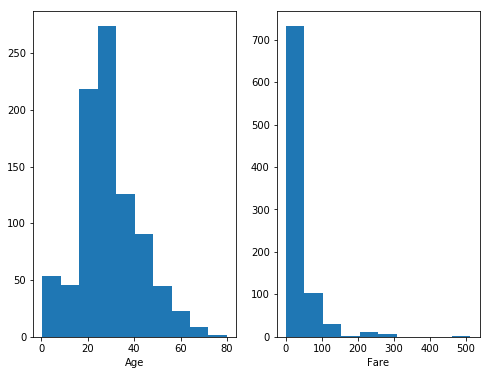

In [24]:
fig = plt.figure()
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.hist(titanic['Age'])
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.hist(titanic['Fare'])
plt.xlabel('Fare')
plt.show()

- From above we can analyze that majority of the age group of people in our present data is between 20-40 years and Fare is between 0-50.

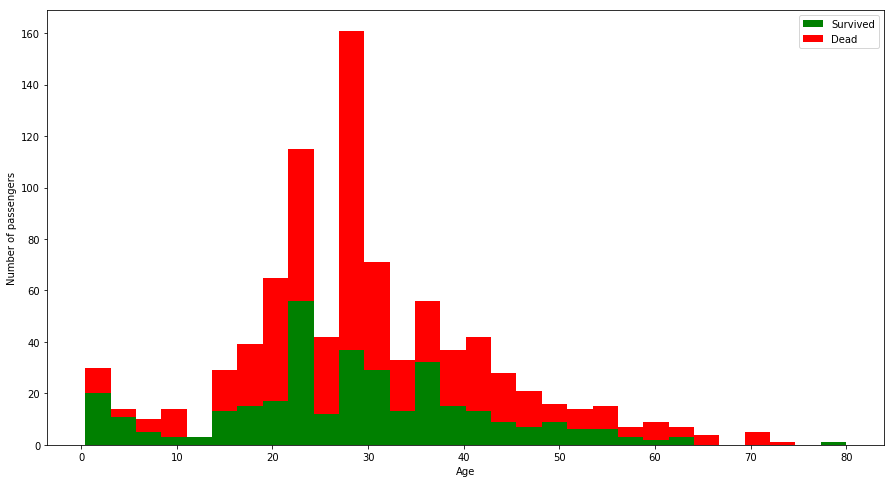

In [25]:
figure = plt.figure(figsize=(15,8))
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

- From here too we can analyze that majority of the age group is between 20-40 years.

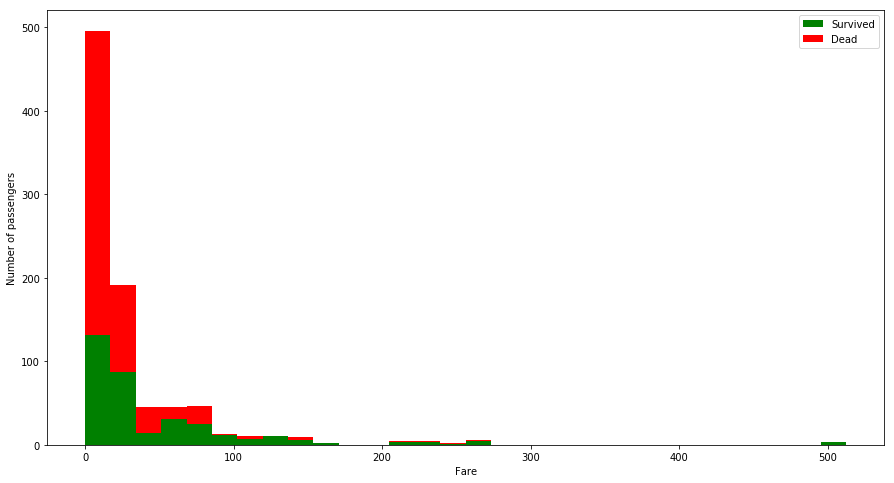

In [26]:
figure = plt.figure(figsize=(15,8))
plt.hist([titanic[titanic['Survived']==1]['Fare'], titanic[titanic['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

- From above we can analyze that maximum fare paid is between 0-50.

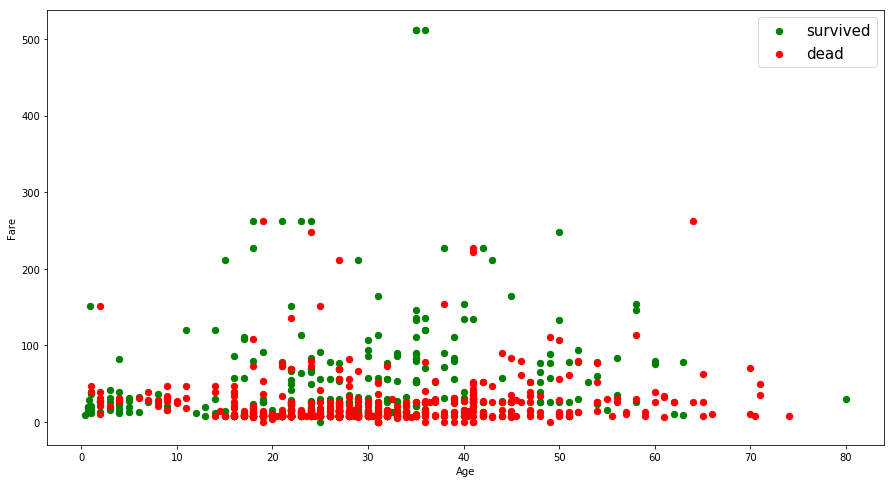

In [27]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(titanic[titanic['Survived']==1]['Age'],titanic[titanic['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(titanic[titanic['Survived']==0]['Age'],titanic[titanic['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.show()

- Since There are alot of outliers present in our data therefore we need
to apply capping and flooring.

## Treating outlier

- Lets define a function for outlier

In [28]:
def outlier_cal(x):
    Q3 = np.quantile(x,0.75)
    Q1 = np.quantile(x,0.25)
    IQR = (Q3-Q1) 
    Lowerlimit = Q1-(1.5*IQR)
    Upperlimit = Q3+(1.5*IQR)
    return print('LL : ',Lowerlimit,'\n UL :',Upperlimit)

#### For Age

In [29]:
outlier_cal(titanic['Age'].values)

LL :  1.0 
 UL : 57.0


In [30]:
LL = 1.0
UL = 57.0
titanic['Age'] = titanic['Age'].clip_upper(UL) 
titanic['Age'] = titanic['Age'].clip_lower(LL)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


Text(0, 0.5, 'Age')

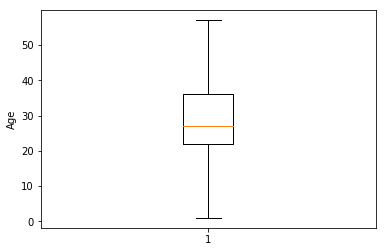

In [31]:
plt.boxplot(titanic['Age'])
plt.ylabel('Age')

#### For Fare

In [32]:
outlier_cal(titanic['Fare'].values)

LL :  -26.7605 
 UL : 65.6563


In [33]:
LL = -26.7605
UL = 65.6563
titanic['Fare'] = titanic['Fare'].clip_upper(UL)
titanic['Fare'] = titanic['Fare'].clip_lower(LL)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


Text(0, 0.5, 'Fare')

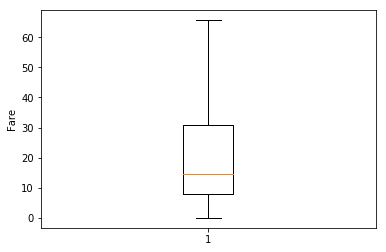

In [34]:
plt.boxplot(titanic['Fare'])
plt.ylabel('Fare')

### 7. Boxplot for Numeric and categorical variables

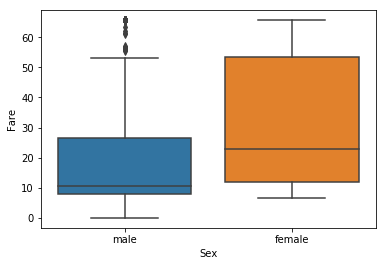

In [35]:
import seaborn as sns
sns.boxplot(x='Sex',y='Fare',data=titanic)

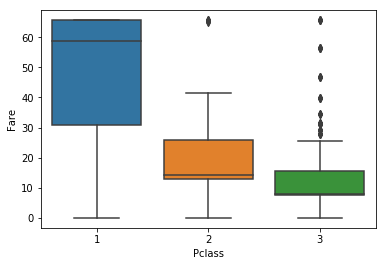

In [36]:
sns.boxplot(x='Pclass',y='Fare',data=titanic)

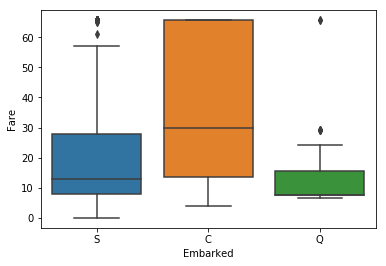

In [37]:
sns.boxplot(x='Embarked',y='Fare',data=titanic)

### 8. Correlation with correlation statistics and heatmap

In [38]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.071237,-0.034040,0.083151,0.313658
Pclass,-0.335549,1.000000,-0.404514,0.081656,0.016824,-0.713413
Age,-0.071237,-0.404514,1.000000,-0.256558,-0.187339,0.167743
SibSp,-0.034040,0.081656,-0.256558,1.000000,0.414542,0.335817
Parch,0.083151,0.016824,-0.187339,0.414542,1.000000,0.296199
Fare,0.313658,-0.713413,0.167743,0.335817,0.296199,1.000000


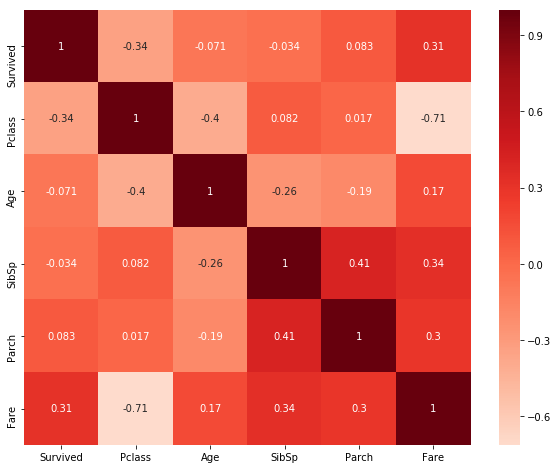

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True,center=0,cmap=plt.cm.Reds,linewidths=0)

From above we can analyze that:
- Pclass and Fare are negatively correlated.
- And the major factors that are impacting Survived column are Pclass and Fare.

# Treating categorical variables

In [40]:
# OneHot Encoding
titanic = pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,65.6563,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Feature Selection

In [41]:
'''Importing Necessary libraries'''
from sklearn.feature_selection import VarianceThreshold,chi2,f_classif,mutual_info_classif

### 1. Checking the Importance of Categorical columns

In [42]:
chi2,pval=chi2(titanic.drop(['Age','Fare','Survived'],axis=1),titanic['Survived'])

In [43]:
chi2

array([3.01352661e+01, 2.39118845e+00, 1.04485980e+01, 1.69242305e+02,
       9.15140369e+01, 2.08285579e+01, 1.67051421e-02, 5.64388676e+00])

In [44]:
x=['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C',\
       'Embarked_Q', 'Embarked_S']
a=[]
for i in chi2:
    a.append('%.2f'%i)

In [45]:
cat_var=pd.DataFrame(zip(x,a),columns=['Categorical columns','Importance'])
cat_var

,Categorical columns,Importance
0,Pclass,30.14
1,SibSp,2.39
2,Parch,10.45
3,Sex_female,169.24
4,Sex_male,91.51
5,Embarked_C,20.83
6,Embarked_Q,0.02
7,Embarked_S,5.64


- From above we can analyze that out of Qualitative columns 'Sex','Pclass' and 'Parch' has major impact on the dependent variable.

### 2. Checking Variation amongst the independent variables

In [46]:
vt=VarianceThreshold(threshold=0.2)
vt.fit_transform(titanic.drop('Survived',axis=1))

array([[ 3.    , 22.    ,  1.    , ...,  7.25  ,  0.    ,  1.    ],
       [ 1.    , 38.    ,  1.    , ..., 65.6563,  1.    ,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  7.925 ,  1.    ,  0.    ],
       ...,
       [ 3.    , 22.    ,  1.    , ..., 23.45  ,  1.    ,  0.    ],
       [ 1.    , 26.    ,  0.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    , 32.    ,  0.    , ...,  7.75  ,  0.    ,  1.    ]])

In [47]:
x=[]
for i in vt.variances_:
    x.append('%.2f'%i)

In [48]:
var=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',\
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
var_df=pd.DataFrame(zip(var,x),columns=['Columns','Variation'])
var_df

,Columns,Variation
0,Survived,0.70
1,Pclass,158.59
2,Age,1.22
3,SibSp,0.65
4,Parch,416.30
5,Fare,0.23
6,Sex_female,0.23
7,Sex_male,0.15
8,Embarked_C,0.08
9,Embarked_Q,0.20


- From above we can analyze that feature 'Embarked_C' has very less variation as compared to other variables,therefore we can drop the same.

In [49]:
titanic=titanic.drop(['Embarked_C'],axis=1)

### 3. Checking the Importance of Quantitative columns

In [50]:
chi2,pval=f_classif(titanic[['Age','Fare']],titanic['Survived'])

In [51]:
chi2

array([ 4.52416755, 96.78635366])

- From above we can analyze that Fare has much more impact on Survival as compared to Age.

### 4. Mututal Information for Classification

In [52]:
imp_fetures=mutual_info_classif(titanic.drop('Survived',axis=1),titanic['Survived'])

In [53]:
imp_fetures

array([0.06685234, 0.0190828 , 0.04198333, 0.02350692, 0.12589859,
       0.16409387, 0.16046705, 0.        , 0.02205382])

In [54]:
x=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',\
       'Embarked_Q', 'Embarked_S']
imp_features=pd.DataFrame(zip(x,imp_fetures),columns=['Columns','Importance'])
imp_features

,Columns,Importance
0,Pclass,0.066852
1,Age,0.019083
2,SibSp,0.041983
3,Parch,0.023507
4,Fare,0.125899
5,Sex_female,0.164094
6,Sex_male,0.160467
7,Embarked_Q,0.000000
8,Embarked_S,0.022054


- From above we can analyze that features like 'Fare','Sex' and 'PClass' have the major impact.

In [55]:
'''Dropping Column Embarked_S as it dosn't have much impact on Survival'''
titanic=titanic.drop('Embarked_S',axis=1)

# Target on which model needs to be deployed

In [56]:
#Importing data
titanic_test = pd.read_csv('C:/Users/Administrator/Desktop/Python/Kaggle/titanic/test.csv')

In [57]:
titanic_test=titanic_test.drop(['PassengerId'],axis=1)

In [58]:
titanic_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

## 1.  Missing Value Treatment

#### Age

In [59]:
a = titanic_test.groupby(['Pclass','Sex'])['Age'].mean()
a =a.reset_index()
a['Age'] = round(a['Age'])
b = titanic_test[titanic_test['Age'].isnull()]
b[(b['Pclass']==1) & (b['Sex']=='female')]=b[(b['Pclass']==1) & (b['Sex']=='female')].fillna(a['Age'][0])
b[(b['Pclass']==1) & (b['Sex']=='male')]=b[(b['Pclass']==1) & (b['Sex']=='male')].fillna(a['Age'][1])
b[(b['Pclass']==2) & (b['Sex']=='female')]=b[(b['Pclass']==2) & (b['Sex']=='female')].fillna(a['Age'][2])
b[(b['Pclass']==2) & (b['Sex']=='male')]=b[(b['Pclass']==2) & (b['Sex']=='male')].fillna(a['Age'][3])
b[(b['Pclass']==3) & (b['Sex']=='female')]=b[(b['Pclass']==3) & (b['Sex']=='female')].fillna(a['Age'][4])
b[(b['Pclass']==3) & (b['Sex']=='male')]=b[(b['Pclass']==3) & (b['Sex']=='male')].fillna(a['Age'][5])


titanic_test['Age'] = titanic_test['Age'].fillna(b['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

#### Fare

In [60]:
x=round(titanic_test['Fare'].mean())

In [61]:
titanic_test['Fare']=titanic_test['Fare'].fillna(x)

#### Cabin

In [62]:
# Removing column Cabin,Ticket and Name as it is not necessary
titanic_test=titanic_test.drop(['Cabin','Name','Ticket'],axis=1)

## 2.  Treating Outliers

#### Age

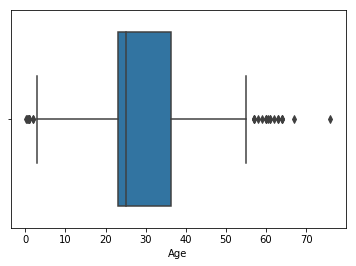

In [63]:
sns.boxplot(titanic_test['Age'])

In [64]:
outlier_cal(titanic_test['Age'].values)

LL :  2.9375 
 UL : 56.4375


In [65]:
UL=56.4375
LL=2.9375
titanic_test['Age'] = titanic_test['Age'].clip_upper(UL) 
titanic_test['Age'] = titanic_test['Age'].clip_lower(LL)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


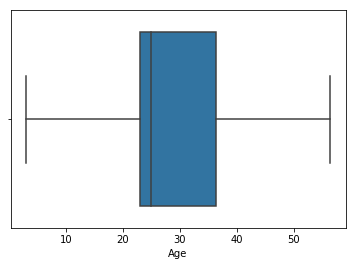

In [66]:
sns.boxplot(titanic_test['Age'])

#### Fare

In [67]:
# Converting Fare column to 'Integer'

In [68]:
titanic_test['Fare']=titanic_test['Fare'].astype(float)

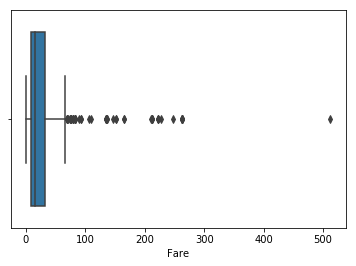

In [69]:
sns.boxplot(titanic_test['Fare'])

In [70]:
outlier_cal(titanic_test['Fare'].values)

LL :  -27.5105 
 UL : 66.9063


In [71]:
UL=66.9063
LL=-27.5105
titanic_test['Fare'] = titanic_test['Fare'].clip_upper(UL) 
titanic_test['Fare'] = titanic_test['Fare'].clip_lower(LL)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


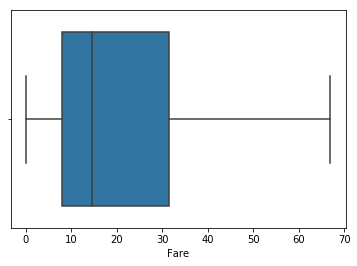

In [72]:
sns.boxplot(titanic_test['Fare'])

## 3. Treating Categorical Variables

In [73]:
titanic_test=pd.get_dummies(titanic_test)

In [74]:
# Removing columns that are not required
titanic_test=titanic_test.drop(['Embarked_C','Embarked_S'],axis=1)

- Target where we will deploy our model

In [75]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Q
0,3,34.5000,0,0,7.8292,0,1,1
1,3,47.0000,1,0,7.0000,1,0,0
2,2,56.4375,0,0,9.6875,0,1,1
3,3,27.0000,0,0,8.6625,0,1,0
4,3,22.0000,1,1,12.2875,1,0,0


# Splitting Data 

In [76]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Q
0,0,3,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,65.6563,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,0


In [77]:
X = titanic.iloc[:,1:]
Y = titanic.iloc[:,0]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Buliding model

### 1. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
#Fitting model
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
from sklearn.model_selection import cross_validate
cross_validate(log_reg,X,Y,cv=10)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\skl

{'fit_time': array([0.00748515, 0.00748158, 0.00748706, 0.00848436, 0.00698757,
        0.00598907, 0.00598741, 0.00548863, 0.00598884, 0.0059886 ]),
 'score_time': array([0.00149894, 0.00299501, 0.00150061, 0.00199676, 0.00149798,
        0.00199652, 0.00149775, 0.00199628, 0.00149822, 0.00199533]),
 'test_score': array([0.78651685, 0.79775281, 0.76404494, 0.86516854, 0.79775281,
        0.7752809 , 0.78651685, 0.7752809 , 0.82022472, 0.79545455])}

In [83]:
#Predicting result
y_pred = log_reg.predict(x_test)
pd.Series(y_pred).value_counts()

0    110
1     68
dtype: int64

- Evaluating our model

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8258426966292135

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[94, 15],
       [16, 53]], dtype=int64)

In [86]:
res=log_reg.predict(titanic_test)

# Comparing results of deployed model with actual data to check the accuracy

In [87]:
#Importing data
titanic_actual = pd.read_csv('C:/Users/Administrator/Desktop/Python/Kaggle/titanic/gender_submission.csv')

In [88]:
accuracy_score(titanic_actual['Survived'],res)

0.9282296650717703

# Creating final dataframe with PassengerId along with Survived column as predicted by the model

In [95]:
new_df=pd.DataFrame(zip(titanic_actual['PassengerId'],res),columns=['PassengerId','Survived'])

In [99]:
new_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# From above we have analyzed that our model is working perfectly.